<a href="https://colab.research.google.com/github/ksabmagar7/py.pract/blob/main/satellite_data_in_py/1.%20Landsat%20data%20in%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**- learning to load landsat data in collab**


In [ ]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

We're running Colab


allow the google drive to be connected.

In [ ]:
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/Satellite_data_in_python"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root

Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/Colab Notebooks/Satellite_data_in_python  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks/Satellite_data_in_python
/content/gdrive/My Drive/Colab Notebooks/Satellite_data_in_python


- untar the tar

In [ ]:
!tar -xvf "/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1.tar" -C "/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python"     #[run this cell to extract tar files]

LC09_L2SP_142040_20211209_20220120_02_T1_ANG.txt
LC09_L2SP_142040_20211209_20220120_02_T1_MTL.json
LC09_L2SP_142040_20211209_20220120_02_T1_MTL.txt
LC09_L2SP_142040_20211209_20220120_02_T1_MTL.xml
LC09_L2SP_142040_20211209_20220120_02_T1_QA_PIXEL.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_QA_RADSAT.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B1.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B2.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B3.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B4.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B5.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B6.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_B7.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_QA_AEROSOL.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_SR_stac.json
LC09_L2SP_142040_20211209_20220120_02_T1_ST_ATRAN.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_ST_B10.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_ST_CDIST.TIF
LC09_L2SP_142040_20211209_20220120_02_T1_ST_DRAD.TIF
LC09_L2SP_1

- we create a list of subsets of landsat .tif files using glob and os.path.join
- we crop xarray objects.
- we Stack a list of landsat .tif files into a xarray object.
- we create a workflow that opens, stacks and cleans landsat data efficiently.

installing the packages, 
and importing

In [ ]:
import os
from glob import glob
!pip install geopandas
!pip install rasterio
!pip install rioxarray
!pip install earthpy
!pip install earthpy.spatial
!pip install matplotlib-venn
!pip install earthpy.plot

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import mapping


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 385 kB/s 
     |████████████████████████████████| 6.3 MB 30.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=9e53481865e9346b2397c7c77895a1bb3acce666b9e42c2d88678bb00e69f280
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarra

selection of tif files

In [ ]:
from glob import glob
L9 = glob("/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/*T1_SR_B*[1-7]*.TIF")
L9

['/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B1.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B2.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B3.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B4.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B5.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B6.TIF',
 '/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/LC09_L2SP_142040_20211209_20220120_02_T1_SR_B7.TIF']

- as xarry object

In [ ]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

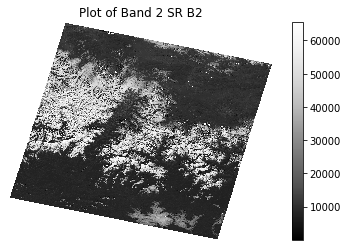

In [ ]:
landsat_band_2 = open_clean_band(L9[1])
# Plot the data
f, ax = plt.subplots()
landsat_band_2.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("Plot of Band 2 SR B2")
ax.set_axis_off()
plt.show()

In [ ]:
my_shp = gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/kaski_shp/kaski_boundary.shp')

landsat_crs = es.crs_check(L9[0])

print("Landsat crs is:", landsat_crs)
print("Fire boundary crs", my_shp.crs)

Landsat crs is: EPSG:32645
Fire boundary crs epsg:4326


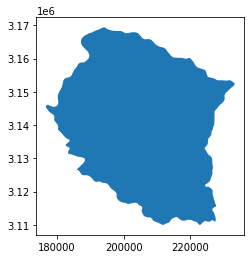

In [ ]:
my_shp_L9 = my_shp.to_crs(landsat_crs)
my_shp_L9.plot()
plt.show()

In [ ]:
landsat_1_clip = rxr.open_rasterio(L9[1]).rio.clip(
     my_shp_L9.geometry,
    from_disk=True).squeeze()

# Notice the x and y data dimensions of your data have changed
landsat_1_clip

<xarray.DataArray (y: 1982, x: 1895)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
Coordinates:
  * x            (x) float64 1.766e+05 1.767e+05 ... 2.334e+05 2.335e+05
  * y            (y) float64 3.169e+06 3.169e+06 3.169e+06 ... 3.11e+06 3.11e+06
    band         int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    0

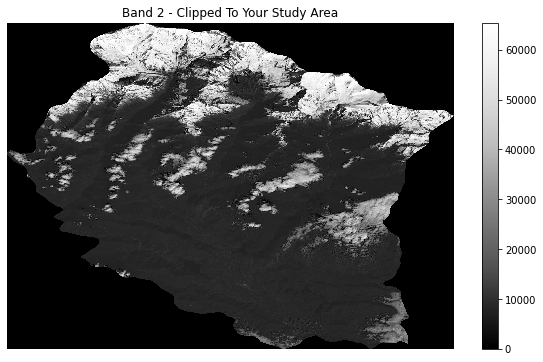

In [ ]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 6))
landsat_1_clip.plot.imshow(cmap="Greys_r",
                                 ax=ax)
ax.set_axis_off()
ax.set_title("Band 2 - Clipped To Your Study Area")
plt.show()

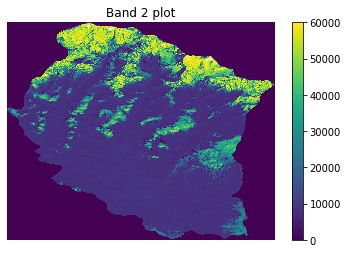

In [ ]:
# Clean the data
valid_range = (0, 60000)
# Only run this step if a valid range tuple is provided
if valid_range:
    mask = ((landsat_1_clip < valid_range[0]) | (
        landsat_1_clip > valid_range[1]))
    landsat_1_clip = landsat_1_clip.where(
        ~xr.where(mask, True, False))

f, ax = plt.subplots()
landsat_1_clip.plot(ax=ax)
ax.set_title("Band 2 plot")
ax.set_axis_off()
plt.show()

In [ ]:
def open_clean_band(band_path, clip_extent, valid_range=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    clip_extent : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE: this will 
        fail if the clip extent is in a different CRS than the raster data.

    valid_range : tuple (optional)
        The min and max valid range for the data. All pixels with values outside
        of this range will be masked.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Oops, I need a geodataframe object for this to work.")
        print(err)

    cleaned_band = rxr.open_rasterio(band_path,
                                     masked=True).rio.clip(clip_bound,
                                                           from_disk=True).squeeze()

    # Only mask the data if a valid range tuple is provided
    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band = landsat_post_xr_clip.where(
            ~xr.where(mask, True, False))

    return cleaned_band

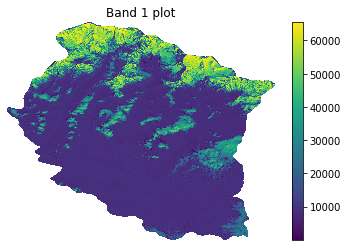

In [ ]:
cleaned_band = open_clean_band(L9[0], my_shp_L9)

f, ax = plt.subplots()
cleaned_band.plot(ax=ax)
ax.set_title("Band 1 plot")
ax.set_axis_off()
plt.show()

In [ ]:
from glob import glob
L9 = glob("/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/*T1_SR_B*[1-7]*.TIF")

L9_all_bands = []

for i, aband in enumerate(L9):
    cleaned = open_clean_band(aband, my_shp_L9)
    # This line below is only needed if you wish to stack and plot your data
    cleaned["band"] = i+1
    L9_all_bands.append(cleaned)

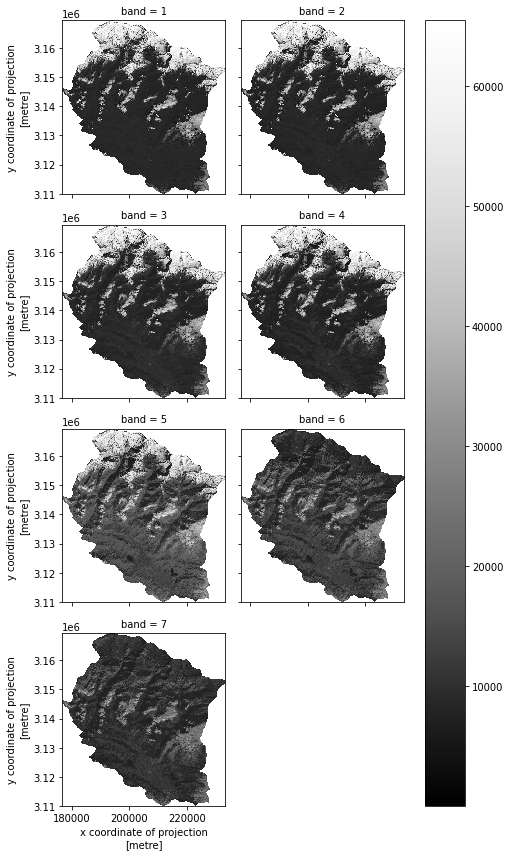

In [ ]:
L9_all_bands = xr.concat(L9_all_bands, dim="band")

L9_all_bands.plot.imshow(col="band",
                            col_wrap=2,
                            cmap="Greys_r")
plt.show()

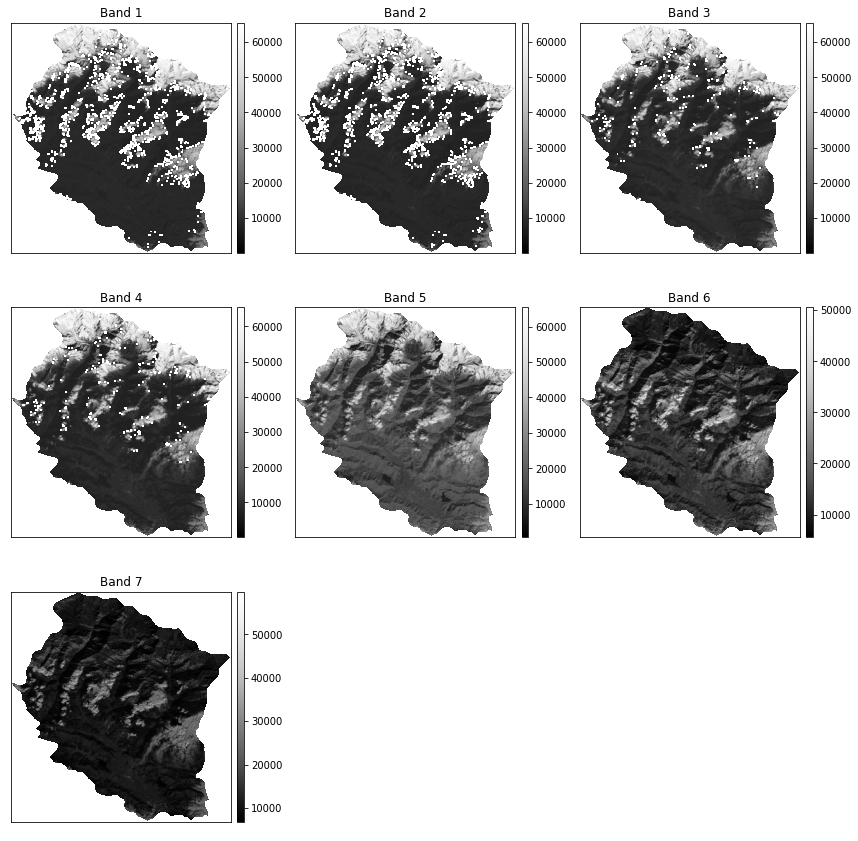

In [ ]:
# Plot using earthpy

ep.plot_bands(L9_all_bands)

plt.show()

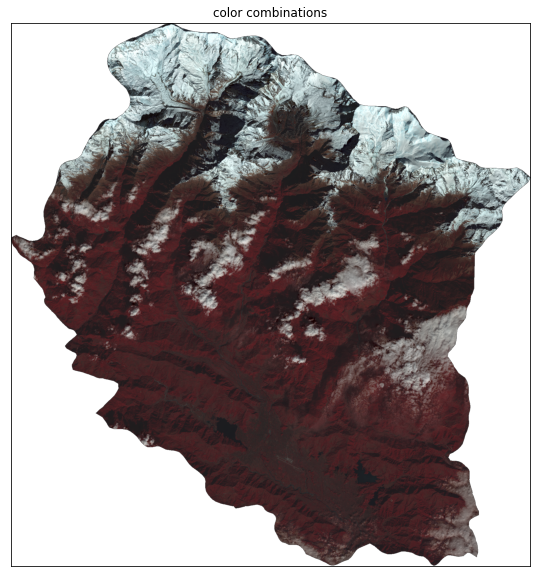

In [ ]:
ep.plot_rgb(L9_all_bands,
            rgb=[4, 3, 2],
            title="color combinations")

plt.show()

In [ ]:
L9_ndvi = es.normalized_diff(L9_all_bands[4], L9_all_bands[3])

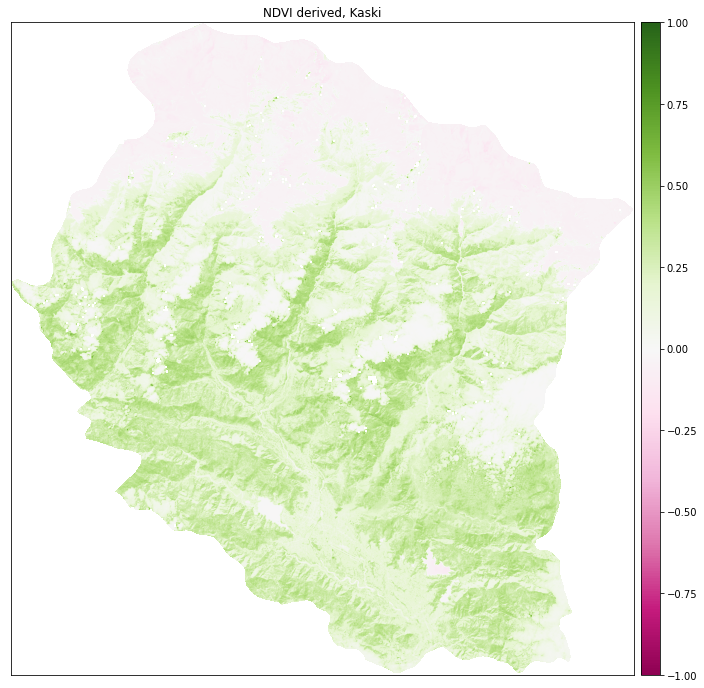

In [ ]:
ep.plot_bands(L9_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NDVI derived, Kaski")
plt.show()

In [ ]:
import cv2
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Satellite_data_in_python/L9_ndvi.tif' , L9_ndvi)

True

### learnings from 
### earthscience.org